In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

In [3]:
!wget $data

--2025-10-20 11:57:13--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.001s  

2025-10-20 11:57:14 (69.2 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



In [2]:
df = pd.read_csv('course_lead_scoring.csv')

In [3]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [5]:
df[categorical] = df[categorical].fillna('NA')
df[numerical] = df[numerical].fillna(0)

In [6]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [7]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [8]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [9]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [10]:
roc_auc_score(y_train, df_train['number_of_courses_viewed'])

0.7635680590007088

In [11]:
roc_auc_score(y_train, df_train['annual_income'])

0.5519578313253012

In [12]:
roc_auc_score(y_train, df_train['interaction_count'])

0.738270176293409

In [13]:
roc_auc_score(y_train, df_train['lead_score'])

0.6144993577250176

In [14]:
dv = DictVectorizer(sparse=False)

In [15]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [16]:
model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=10000)

In [17]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [18]:
y_pred = model.predict_proba(X_val)[:, 1]

In [19]:
round(roc_auc_score(y_val, y_pred), 2)

0.92

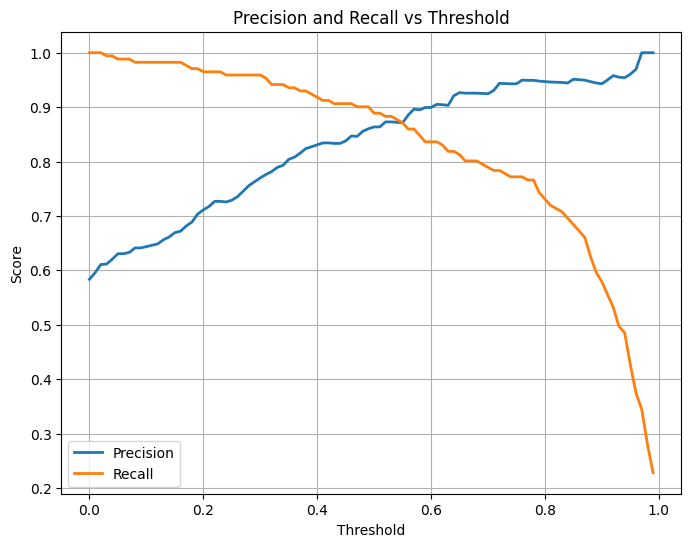

In [20]:
thresholds = np.arange(0.0, 1, 0.01)
precisions = []
recalls = []

for t in thresholds:
    y_pred_bin = (y_pred >= t).astype(int)
    precisions.append(precision_score(y_val, y_pred_bin, zero_division=0))
    recalls.append(recall_score(y_val, y_pred_bin))

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', linewidth=2)
plt.plot(thresholds, recalls, label='Recall', linewidth=2)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
for t in thresholds:
    y_pred_bin = (y_pred >= t).astype(int)
    P = precision_score(y_val, y_pred_bin, zero_division=0)
    R = recall_score(y_val, y_pred_bin)
    F1 = 2*(P*R/(P+R))
    print(round(t, 2), round(F1, 2))

0.0 0.74
0.01 0.75
0.02 0.76
0.03 0.76
0.04 0.76
0.05 0.77
0.06 0.77
0.07 0.77
0.08 0.78
0.09 0.78
0.1 0.78
0.11 0.78
0.12 0.78
0.13 0.79
0.14 0.79
0.15 0.8
0.16 0.8
0.17 0.8
0.18 0.81
0.19 0.82
0.2 0.82
0.21 0.82
0.22 0.83
0.23 0.83
0.24 0.83
0.25 0.83
0.26 0.83
0.27 0.84
0.28 0.85
0.29 0.85
0.3 0.85
0.31 0.86
0.32 0.85
0.33 0.86
0.34 0.86
0.35 0.86
0.36 0.87
0.37 0.87
0.38 0.87
0.39 0.87
0.4 0.87
0.41 0.87
0.42 0.87
0.43 0.87
0.44 0.87
0.45 0.87
0.46 0.88
0.47 0.87
0.48 0.88
0.49 0.88
0.5 0.88
0.51 0.88
0.52 0.88
0.53 0.88
0.54 0.87
0.55 0.87
0.56 0.87
0.57 0.88
0.58 0.87
0.59 0.87
0.6 0.87
0.61 0.87
0.62 0.87
0.63 0.86
0.64 0.87
0.65 0.87
0.66 0.86
0.67 0.86
0.68 0.86
0.69 0.86
0.7 0.85
0.71 0.85
0.72 0.86
0.73 0.85
0.74 0.85
0.75 0.85
0.76 0.85
0.77 0.85
0.78 0.85
0.79 0.83
0.8 0.83
0.81 0.82
0.82 0.81
0.83 0.81
0.84 0.8
0.85 0.8
0.86 0.79
0.87 0.78
0.88 0.75
0.89 0.73
0.9 0.72
0.91 0.7
0.92 0.68
0.93 0.65
0.94 0.64
0.95 0.59
0.96 0.54
0.97 0.51
0.98 0.44
0.99 0.37


In [22]:
!pip install tqdm


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [29]:
from tqdm.auto import tqdm

In [23]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [24]:
dv, model = train(df_train, y_train, C=0.001)

In [25]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [26]:
y_pred = predict(df_val, dv, model)

In [27]:
from sklearn.model_selection import KFold

In [41]:
n_splits = 5

In [42]:
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []
for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
print(round(np.std(scores), 3))    

0.036


In [43]:
for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.560 +- 0.024
C=0.001 0.867 +- 0.029
C=1 0.822 +- 0.036
